# Regresiones Lineales Simples

En este notebook, analizaremos la relación entre la altura y el peso de las personas. Contestaremos las siguientes preguntas:

- ¿Existe una relación entre peso y altura?
- En caso de existir, ¿será una relación lineal?
- ¿Se podrá predecir el peso de una persona a partir de su altura?
- ¿Cuán buena podría ser esa predicción?

Para esto, tomaremos el dataset SOCR Human Height/Weight. Más información en el siguiente link:
http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

Link al dataset:
http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('weight-height.csv')

In [36]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height', ylabel='Weight'>

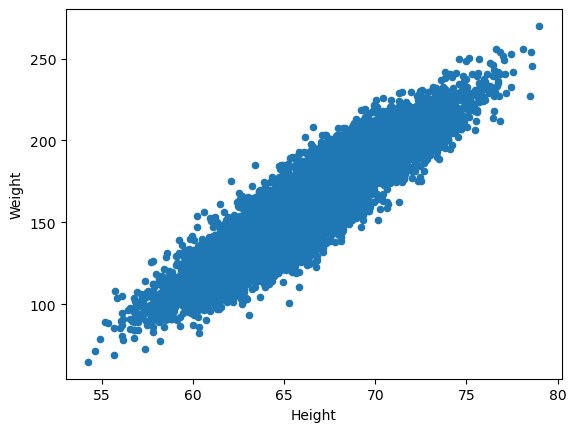

In [38]:
df.plot(kind='scatter', x='Height', y='Weight')

In [44]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [48]:
df[['Height', 'Weight']].corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


# Hipótesis de Trabajo

"El peso de un individuo depende de su altura, y tiene una relación lineal."

In [51]:
import statsmodels.formula.api as smf

In [52]:
lm = smf.ols(data=df, formula="Weight ~ Height").fit()

In [55]:
lm.params

Intercept   -350.737192
Height         7.717288
dtype: float64

In [57]:
lm.params[0]

/var/folders/wk/3vx476t94n98lmq9q8tk27gw0000gn/T/ipykernel_84663/4039256094.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lm.params[0]


-350.7371918121381

In [59]:
lm.params[1]

/var/folders/wk/3vx476t94n98lmq9q8tk27gw0000gn/T/ipykernel_84663/1630149547.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lm.params[1]


7.717287640785392

In [61]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:32:14   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -350.7372      2.111   -166.109      0.000    -354.876    -346.598
Height         7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Realizando Predicciones

In [64]:
x = pd.DataFrame([60, 65, 70, 75, 80], columns=['Height'])
x

,Height
0,60
1,65
2,70
3,75
4,80


In [66]:
lm.predict(x)

0    112.300067
1    150.886505
2    189.472943
3    228.059381
4    266.645819
dtype: float64

### Inspeccionando los resultados

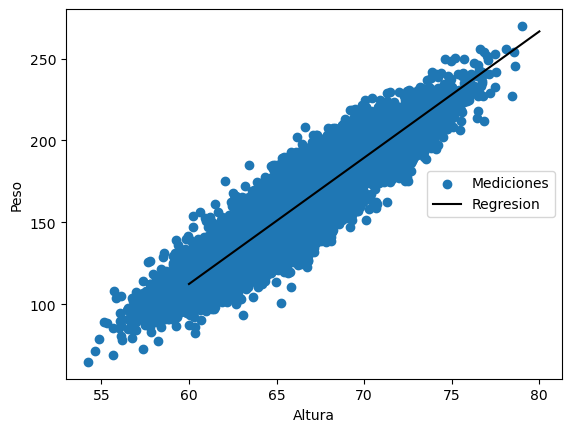

In [69]:
plt.scatter(df['Height'], df['Weight'], label='Mediciones')
plt.plot(x,lm.predict(x), c='black', label='Regresion')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend(loc=7)

### Análisis de Residuales

In [71]:
y_pred = lm.predict(df['Height'])
y_true = df['Weight']

<Axes: ylabel='Density'>

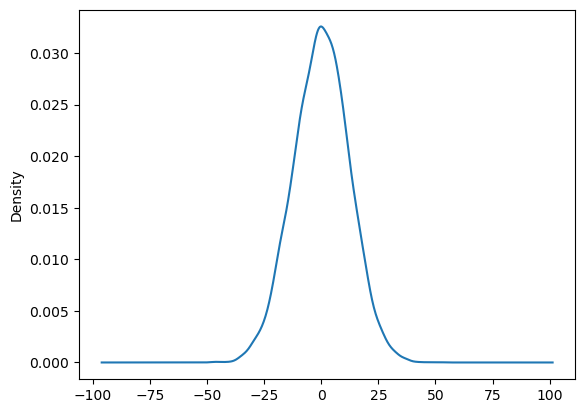

In [73]:
(y_pred - y_true).plot(kind='kde')

## Métricas de Evaluación del Modelo


In [75]:
import statsmodels.tools.eval_measures as metrics

In [77]:
# Mean Absolute Error
metrics.meanabs(y_true,y_pred)

9.746718764605337

In [79]:
# Mean Squared Error
metrics.mse(y_true,y_pred)

149.29348394912958

In [81]:
# Root Medium Squared Error
metrics.rmse(y_true,y_pred)

12.218571272826033

In [83]:
# r2
lm.rsquared

0.8551742120609958